# Fossil Fuel Jobs Visualizations

### Author: Rachel Lu

### Description:


# Import Libraries

In [2]:
%matplotlib notebook
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx


# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

# Import Data

Import California Power Plant dataset. 

In [3]:
cpp = gpd.read_file('California_Power_Plants_MP Cleaned 3.1.21.csv')

# Data Exploration

Let's explore our data. 

In [4]:
type(cpp)

geopandas.geodataframe.GeoDataFrame

In [5]:
cpp.shape

(871, 25)

In [6]:
cpp.head(5)

,Plant_ID,Plant_Label,MW,Gross_MWh,Net_MWh,General_Fuel,Status,Online_Year,REAT_ID,County,...,Congressional_District,CES30_PercentileRange,CES30_Percentile,Longitude,Latitude,Operation_Job,Capacity_Factor,Income_Percent,Project_Location,geometry
0,E0006,Burney Mtn. Power,11,,,Biomass,Operating,1985,C-3,Shasta,...,Congressional District 1,50-55%,51,-121.6395876,40.91000072,,,61,Neither Low Income Nor Disadvantaged Community,None
1,E0056,Mt. Lassen Power,11.4,,,Biomass,Operating,1985,C-4,Lassen,...,Congressional District 1,30-35%,30,-121.0178306,40.29741968,,,66,Neither Low Income Nor Disadvantaged Community,None
2,E0113,Commerce,11.5,,,Biomass,Operating,1986,F-11,Los Angeles,...,Congressional District 40,95-100% (highest scores),97,-118.1537915,33.99486138,,,75,Disadvantaged Community,None
3,E0026,Collins Pine,12,15398.03,8763,Biomass,Operating,1985,C-4,Plumas,...,Congressional District 1,20-25%,24,-121.2439679,40.30207759,,0.08313411,70,Neither Low Income Nor Disadvantaged Community,None
4,E0018,Chowchilla II,12.5,79062.01,67181,Biomass,Standby,2008,D-8,Madera,...,Congressional District 16,70-75%,72,-120.2488396,37.10692537,,0.61184882,48,Low Income,None


In [7]:
cpp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Plant_ID                871 non-null    object  
 1   Plant_Label             871 non-null    object  
 2   MW                      871 non-null    object  
 3   Gross_MWh               871 non-null    object  
 4   Net_MWh                 871 non-null    object  
 5   General_Fuel            871 non-null    object  
 6   Status                  871 non-null    object  
 7   Online_Year             871 non-null    object  
 8   REAT_ID                 871 non-null    object  
 9   County                  871 non-null    object  
 10  State_                  871 non-null    object  
 11  Renewable_Energy        871 non-null    object  
 12  Jobs                    871 non-null    object  
 13  Senate_District         871 non-null    object  
 14  Assembly_District 

# Clean Data

Let's rename some of our columns so they're easier to work with and more intuitive. 

In [8]:
list(cpp)

['Plant_ID',
 'Plant_Label',
 'MW',
 'Gross_MWh',
 'Net_MWh',
 'General_Fuel',
 'Status',
 'Online_Year',
 'REAT_ID',
 'County',
 'State_',
 'Renewable_Energy',
 'Jobs',
 'Senate_District',
 'Assembly_District',
 'Congressional_District',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Longitude',
 'Latitude',
 'Operation_Job',
 'Capacity_Factor',
 'Income_Percent',
 'Project_Location',
 'geometry']

In [9]:
cpp.columns = ['Plant_ID',
 'Name',
 'MW',
 'Gross_MWh',
 'Net_MWh',
 'Fuel_Type',
 'Status',
 'Online_Year',
 'REAT_ID',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'Senate_District',
 'Assembly_District',
 'Congressional_District',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Operation_Job',
 'Capacity_Factor',
 'Income_Percent',
 'Project_Location',
 'geometry']

In [10]:
cpp.head(5)

,Plant_ID,Name,MW,Gross_MWh,Net_MWh,Fuel_Type,Status,Online_Year,REAT_ID,County,...,Congressional_District,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Operation_Job,Capacity_Factor,Income_Percent,Project_Location,geometry
0,E0006,Burney Mtn. Power,11,,,Biomass,Operating,1985,C-3,Shasta,...,Congressional District 1,50-55%,51,-121.6395876,40.91000072,,,61,Neither Low Income Nor Disadvantaged Community,None
1,E0056,Mt. Lassen Power,11.4,,,Biomass,Operating,1985,C-4,Lassen,...,Congressional District 1,30-35%,30,-121.0178306,40.29741968,,,66,Neither Low Income Nor Disadvantaged Community,None
2,E0113,Commerce,11.5,,,Biomass,Operating,1986,F-11,Los Angeles,...,Congressional District 40,95-100% (highest scores),97,-118.1537915,33.99486138,,,75,Disadvantaged Community,None
3,E0026,Collins Pine,12,15398.03,8763,Biomass,Operating,1985,C-4,Plumas,...,Congressional District 1,20-25%,24,-121.2439679,40.30207759,,0.08313411,70,Neither Low Income Nor Disadvantaged Community,None
4,E0018,Chowchilla II,12.5,79062.01,67181,Biomass,Standby,2008,D-8,Madera,...,Congressional District 16,70-75%,72,-120.2488396,37.10692537,,0.61184882,48,Low Income,None


Let's drop some unnecessary columns from our dataset. 

In [11]:
# define variable with desired columns 
desired_columns = [
 'Name',
 'Fuel_Type',
 'Status',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Income_Percent',
 'Project_Location',
 'geometry']

# redefine our dataframe with just our desired columns.

cpp_trim = cpp[desired_columns].copy()

# check out the new dataframe! 
cpp_trim

,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry
0,Burney Mtn. Power,Biomass,Operating,Shasta,CA,1,19.8,50-55%,51,-121.6395876,40.91000072,61,Neither Low Income Nor Disadvantaged Community,None
1,Mt. Lassen Power,Biomass,Operating,Lassen,CA,1,20.5,30-35%,30,-121.0178306,40.29741968,66,Neither Low Income Nor Disadvantaged Community,None
2,Commerce,Biomass,Operating,Los Angeles,CA,1,20.7,95-100% (highest scores),97,-118.1537915,33.99486138,75,Disadvantaged Community,None
3,Collins Pine,Biomass,Operating,Plumas,CA,1,21.6,20-25%,24,-121.2439679,40.30207759,70,Neither Low Income Nor Disadvantaged Community,None
4,Chowchilla II,Biomass,Standby,Madera,CA,1,22.5,70-75%,72,-120.2488396,37.10692537,48,Low Income,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,North Sky River,Wind,Operating,Kern,CA,1,239.8,55-60%,58,-118.1804757,35.3502891,60,Low Income,None
867,Alta V,Wind,Operating,Kern,CA,1,248.6,75-80%,79,-118.2376542,35.00079663,51,Low Income and Disadvantaged Community,None
868,Pinyon Pines I,Wind,Operating,Kern,CA,1,248.6,75-80%,79,-118.2143789,35.03973709,51,Low Income and Disadvantaged Community,None
869,Manzana,Wind,Operating,Kern,CA,1,279.7,70-75%,71,-118.4678447,34.94433117,96,Neither Low Income Nor Disadvantaged Community,None


I created a new dataframe called cpp_trim with only desired columns. I check the work and yes, we have a new dataframe with only the columns we want! 

Next up, we remember that our data types are almost all object types. Let's convert some fields to floats and ints so we can work with them in our visualizations and data analysis. 

In [12]:
# We want to convert coordinates  and jobs to floats. 

cpp_trim.Lon = cpp_trim.Lon.astype('float')
cpp_trim.Lat = cpp_trim.Lat.astype('float')
cpp_trim.Jobs = cpp_trim.Jobs.astype('float')

In [13]:
cpp_trim = gpd.GeoDataFrame(cpp_trim, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(cpp_trim.Lon, cpp_trim.Lat))

cpp_trim.head(5)

,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry
0,Burney Mtn. Power,Biomass,Operating,Shasta,CA,1,19.8,50-55%,51,-121.639588,40.910001,61,Neither Low Income Nor Disadvantaged Community,POINT (-121.63959 40.91000)
1,Mt. Lassen Power,Biomass,Operating,Lassen,CA,1,20.5,30-35%,30,-121.017831,40.297420,66,Neither Low Income Nor Disadvantaged Community,POINT (-121.01783 40.29742)
2,Commerce,Biomass,Operating,Los Angeles,CA,1,20.7,95-100% (highest scores),97,-118.153791,33.994861,75,Disadvantaged Community,POINT (-118.15379 33.99486)
3,Collins Pine,Biomass,Operating,Plumas,CA,1,21.6,20-25%,24,-121.243968,40.302078,70,Neither Low Income Nor Disadvantaged Community,POINT (-121.24397 40.30208)
4,Chowchilla II,Biomass,Standby,Madera,CA,1,22.5,70-75%,72,-120.248840,37.106925,48,Low Income,POINT (-120.24884 37.10693)


In [14]:
# check crs type

cpp_trim.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# CalEnviroScreen

Our research question centers on whether fossil fuel and clean energy jobs are located in disadvantaged communities. Now it's time to overlay the fossil fuel data with CalEnviroScreen data to answer this question.

In [15]:
gdf_ces = gpd.read_file('../CES3June2018Update.shp')

# Explore Data

I begin by exploring the data. Let's make sure that it's a geodataframe, check out the CRS type, and see what the data looks like. 

In [16]:
type(gdf_ces)

geopandas.geodataframe.GeoDataFrame

In [17]:
gdf_ces.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
gdf_ces.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,...,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,...,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,...,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,0.035,...,0.6,4.0,2.6,7864,1,1,6558.956142,2.417717e+06,1-5% (lowest scores),"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,0.035,...,0.8,3.5,3.2,7863,1,1,6570.368642,2.608422e+06,1-5% (lowest scores),"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


During my data exploration, I confirm that my dataframe is a geodataframe, CRS is EPSG:3310 and check out the first 5 rows of my data frame. I see a few things that could be cleaned up. 



# Data Cleaning


In [19]:
#define variable with desired columns 
columns_to_keep = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore', 'CIscoreP', 'edu', 'eduP', 'pov', 'povP', 'unemp', 'unempP', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct', 'geometry']

#redfine dataframe with desired columns 
gdf_ces = gdf_ces[columns_to_keep]

# check to make sure 

gdf_ces.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,24.8,...,32,70.5,13.1,57.5,31.3,1.9,0.5,7.2,1.6,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,46.0,...,61,73.2,6.2,74.0,17.4,1.4,0.2,5.5,1.6,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,26.2,...,7,72.5,13.2,52.2,40.9,0.8,0.5,2.9,2.6,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,6.1,...,47,74.7,14.4,20.0,71.9,1.0,0.6,4.0,2.6,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,12.1,...,32,73.6,15.9,25.7,65.4,1.5,0.8,3.5,3.2,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."



## Sorting and mapping CES scores

To continue exploring the data, I'm going to sort it. I want to see which counties have the highest CES score (that is, are most burdened by and vulnerable to environmental pollution). So I'll create a new dataframe.

In [20]:
# to sort the data by CES score
gdf_sortbyces = gdf_ces.sort_values(by='CIscore', ascending = False)

# check my work 
gdf_sortbyces.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
3067,6.019001e+09,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100,53.3,...,92,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,6.071002e+09,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,100,53.3,...,72,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,6.019000e+09,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,100,42.3,...,88,72.5,6.0,63.6,5.3,18.9,0.6,9.8,1.8,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,6.077001e+09,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,100,40.8,...,95,74.5,6.8,57.4,6.0,12.5,0.3,20.9,2.8,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,6.019002e+09,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,100,45.1,...,94,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."


In [21]:
# create a new dataframe with just the columns I want. 

gdf_sortbyces[['California','City','CIscore','CIscoreP', 'geometry']]

,California,City,CIscore,CIscoreP,geometry
3067,Fresno,Fresno,94.09,100,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,San Bernardino,Ontario,90.68,100,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,Fresno,Fresno,85.97,100,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,San Joaquin,Stockton,82.49,100,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,Fresno,Fresno,82.03,100,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."
...,...,...,...,...,...
5521,Solano,Travis AFB,0.00,0,"POLYGON ((-165293.742 31212.731, -167315.316 2..."
6485,Los Angeles,Los Angeles,0.00,0,"POLYGON ((156330.169 -427148.499, 156829.129 -..."
6452,Los Angeles,Pomona,0.00,0,"POLYGON ((202617.437 -439728.221, 202248.399 -..."
532,Orange,Anaheim,0.00,0,"POLYGON ((201165.266 -458576.548, 201859.426 -..."


Now, let's map it out!



<IPython.core.display.Javascript object>


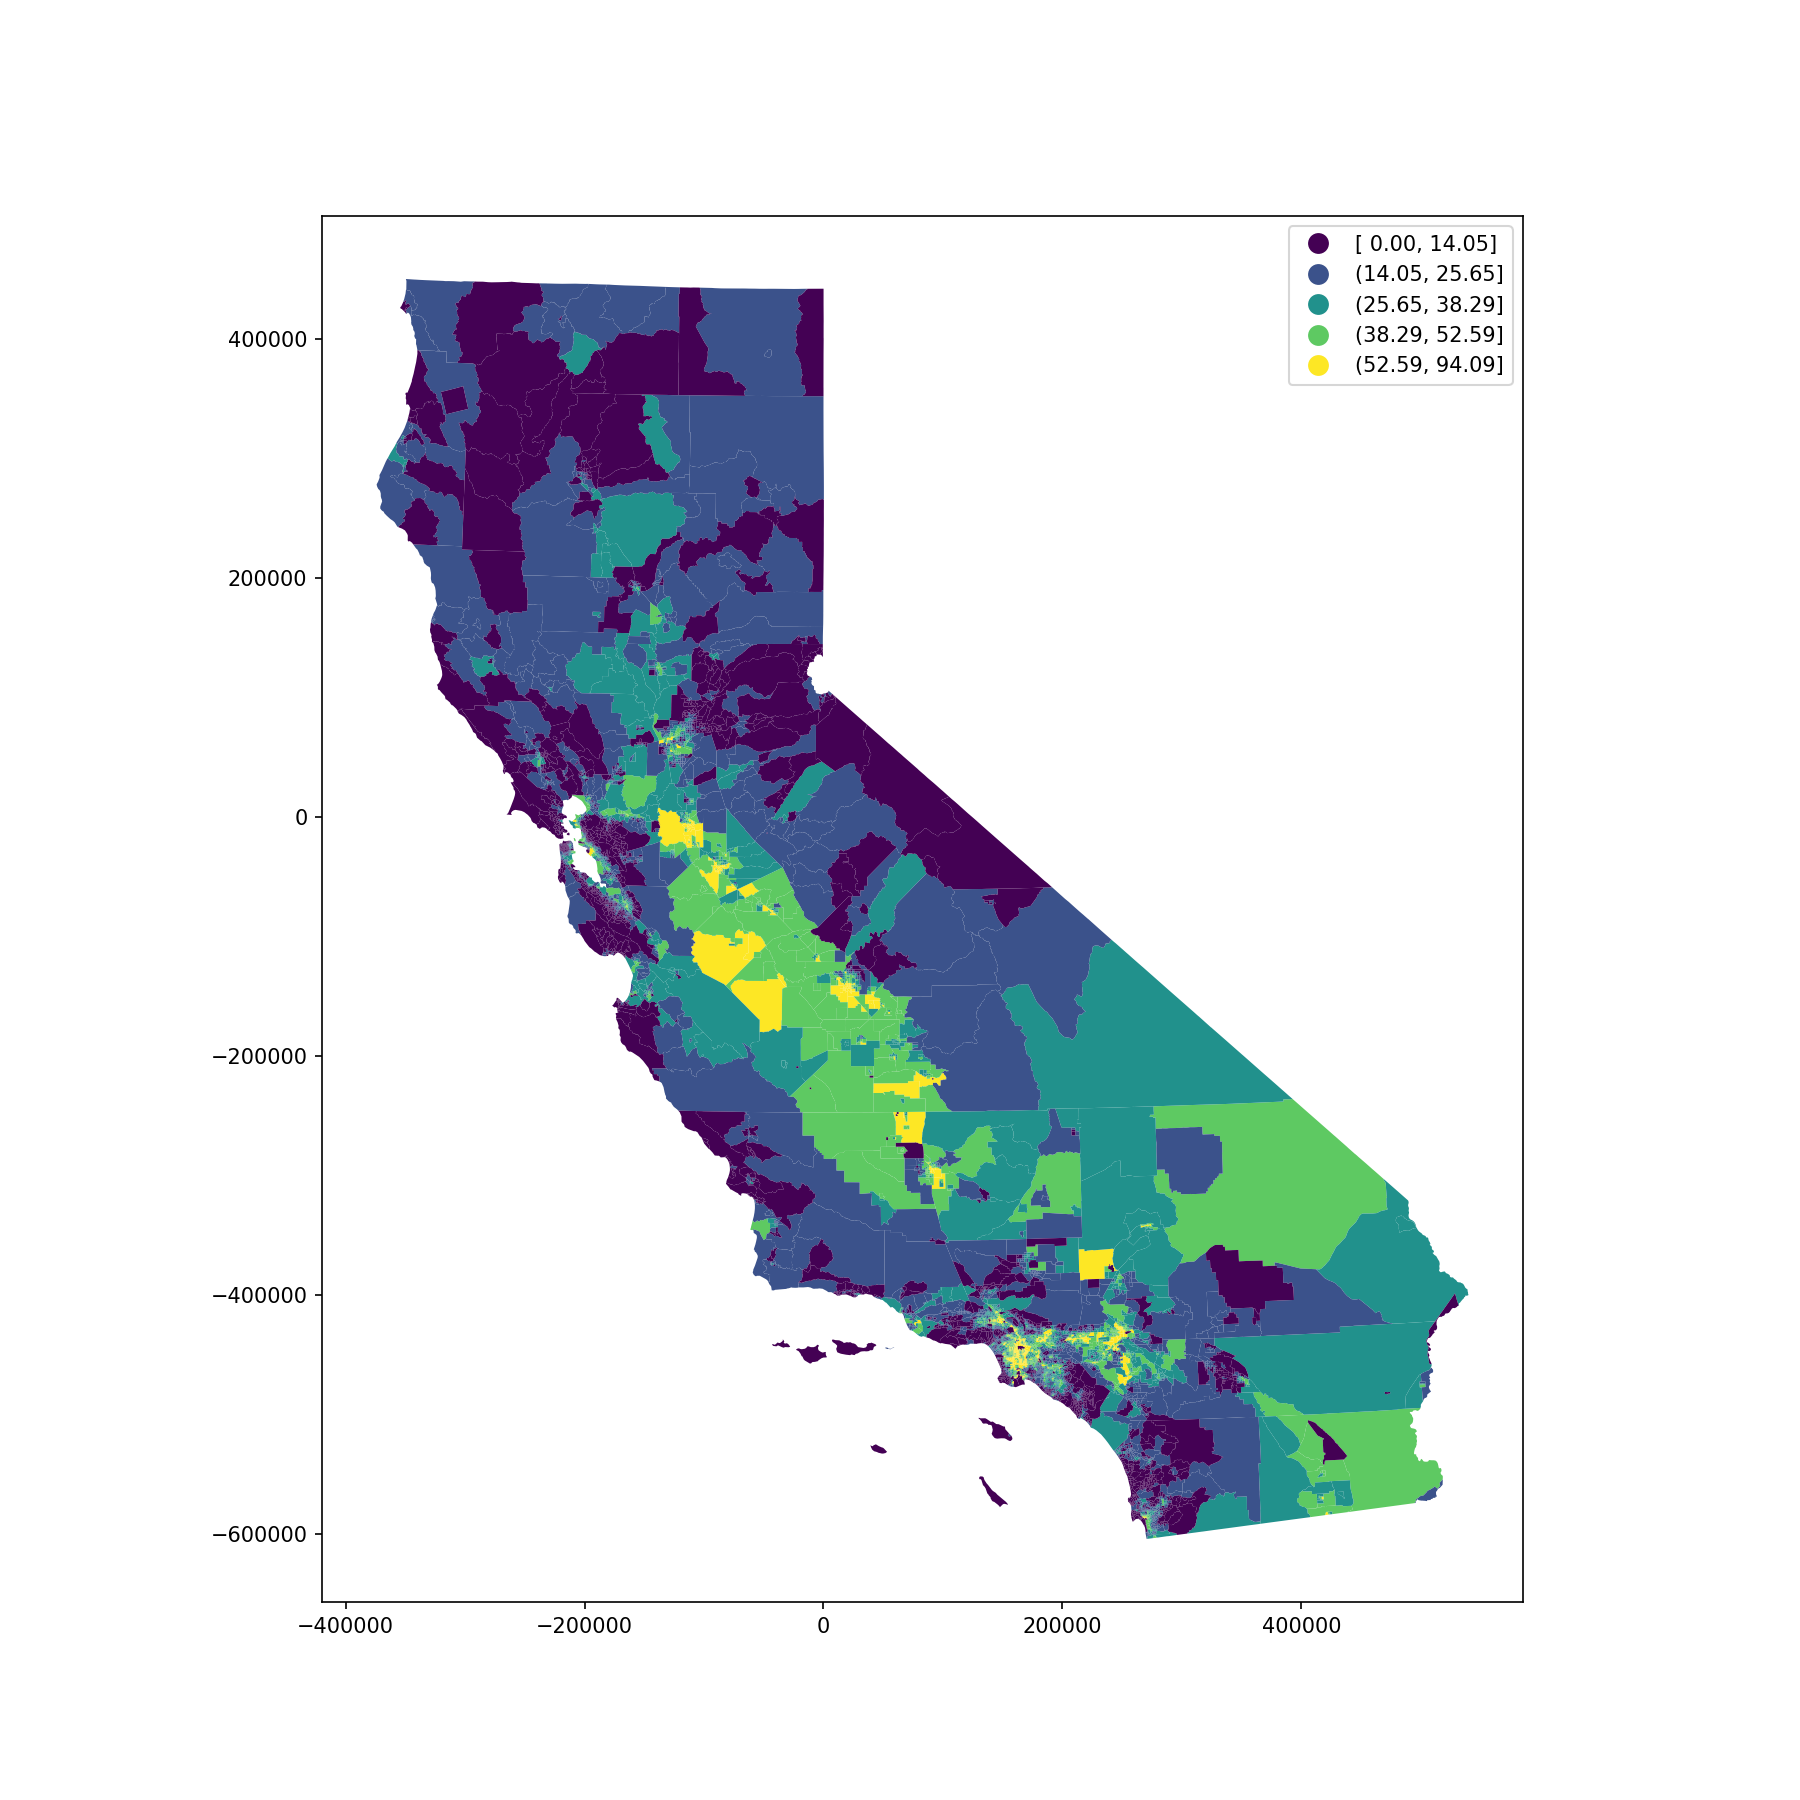

In [22]:
# to map the sorted dataframe using geopandas chloropleth maps
gdf_sortbyces.plot(figsize=(12,12),
                   column='CIscore',
                   legend=True,
                   scheme='NaturalBreaks')

Success! Here's a map that shows the state of California by census tracts sorted by CES score. I used the natural breaks scheme, which skews the data a bit by grouping tracts with high CES scores together.

The natural breaks map shows that there seems to be a natural break around CES scores of 52.

# Overlay Fossil Fuel Jobs and CalEnviroScreen

When we explored our CES data above, we discovered that it's CRS is in EPSG:3310, which is different from our CRS for the CPP dataset. Let's make sure they're in the same CRS. 

In [23]:
#reproject gdf_sortbyces to web mercator. 

gdf_sortbyces = gdf_sortbyces.to_crs(epsg=3857)

#reproject cpp_trim to web mercator
cpp_trim = cpp_trim.to_crs(epsg=3857)

# check work

print(gdf_sortbyces.crs)

epsg:3857


In [24]:
print(cpp_trim.crs)

epsg:3857


<IPython.core.display.Javascript object>


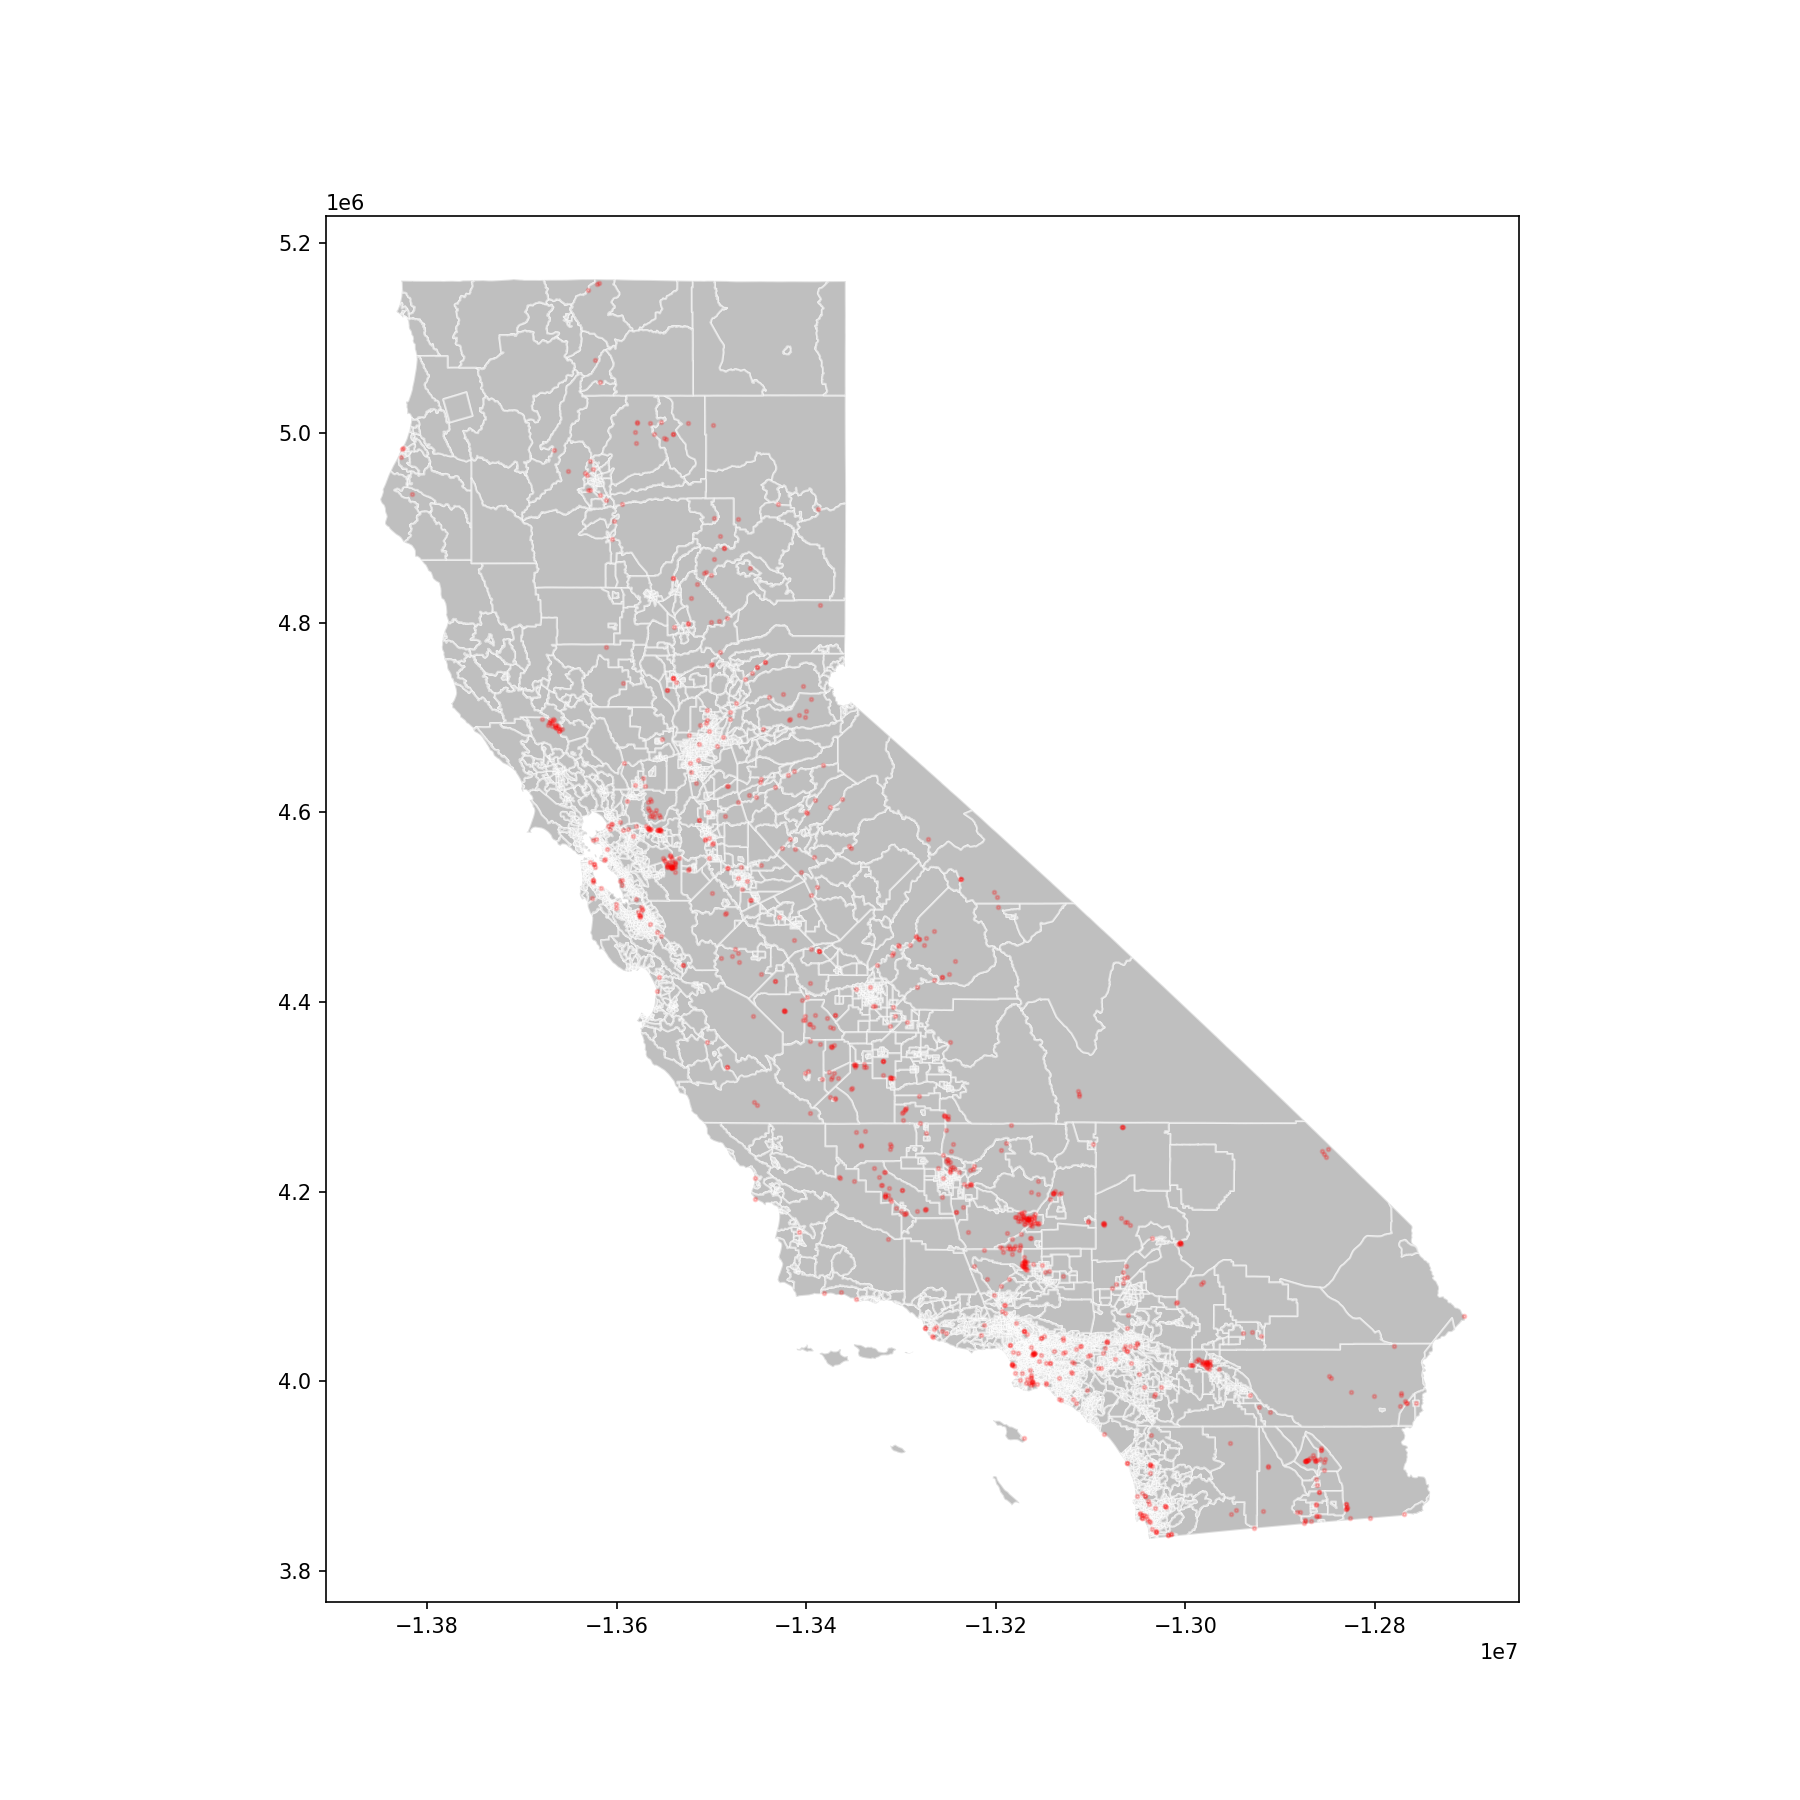

In [25]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(12, 12))

# block groups
gdf_sortbyces.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# cpp_trim
cpp_trim.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=3,
            alpha=0.2)

<IPython.core.display.Javascript object>


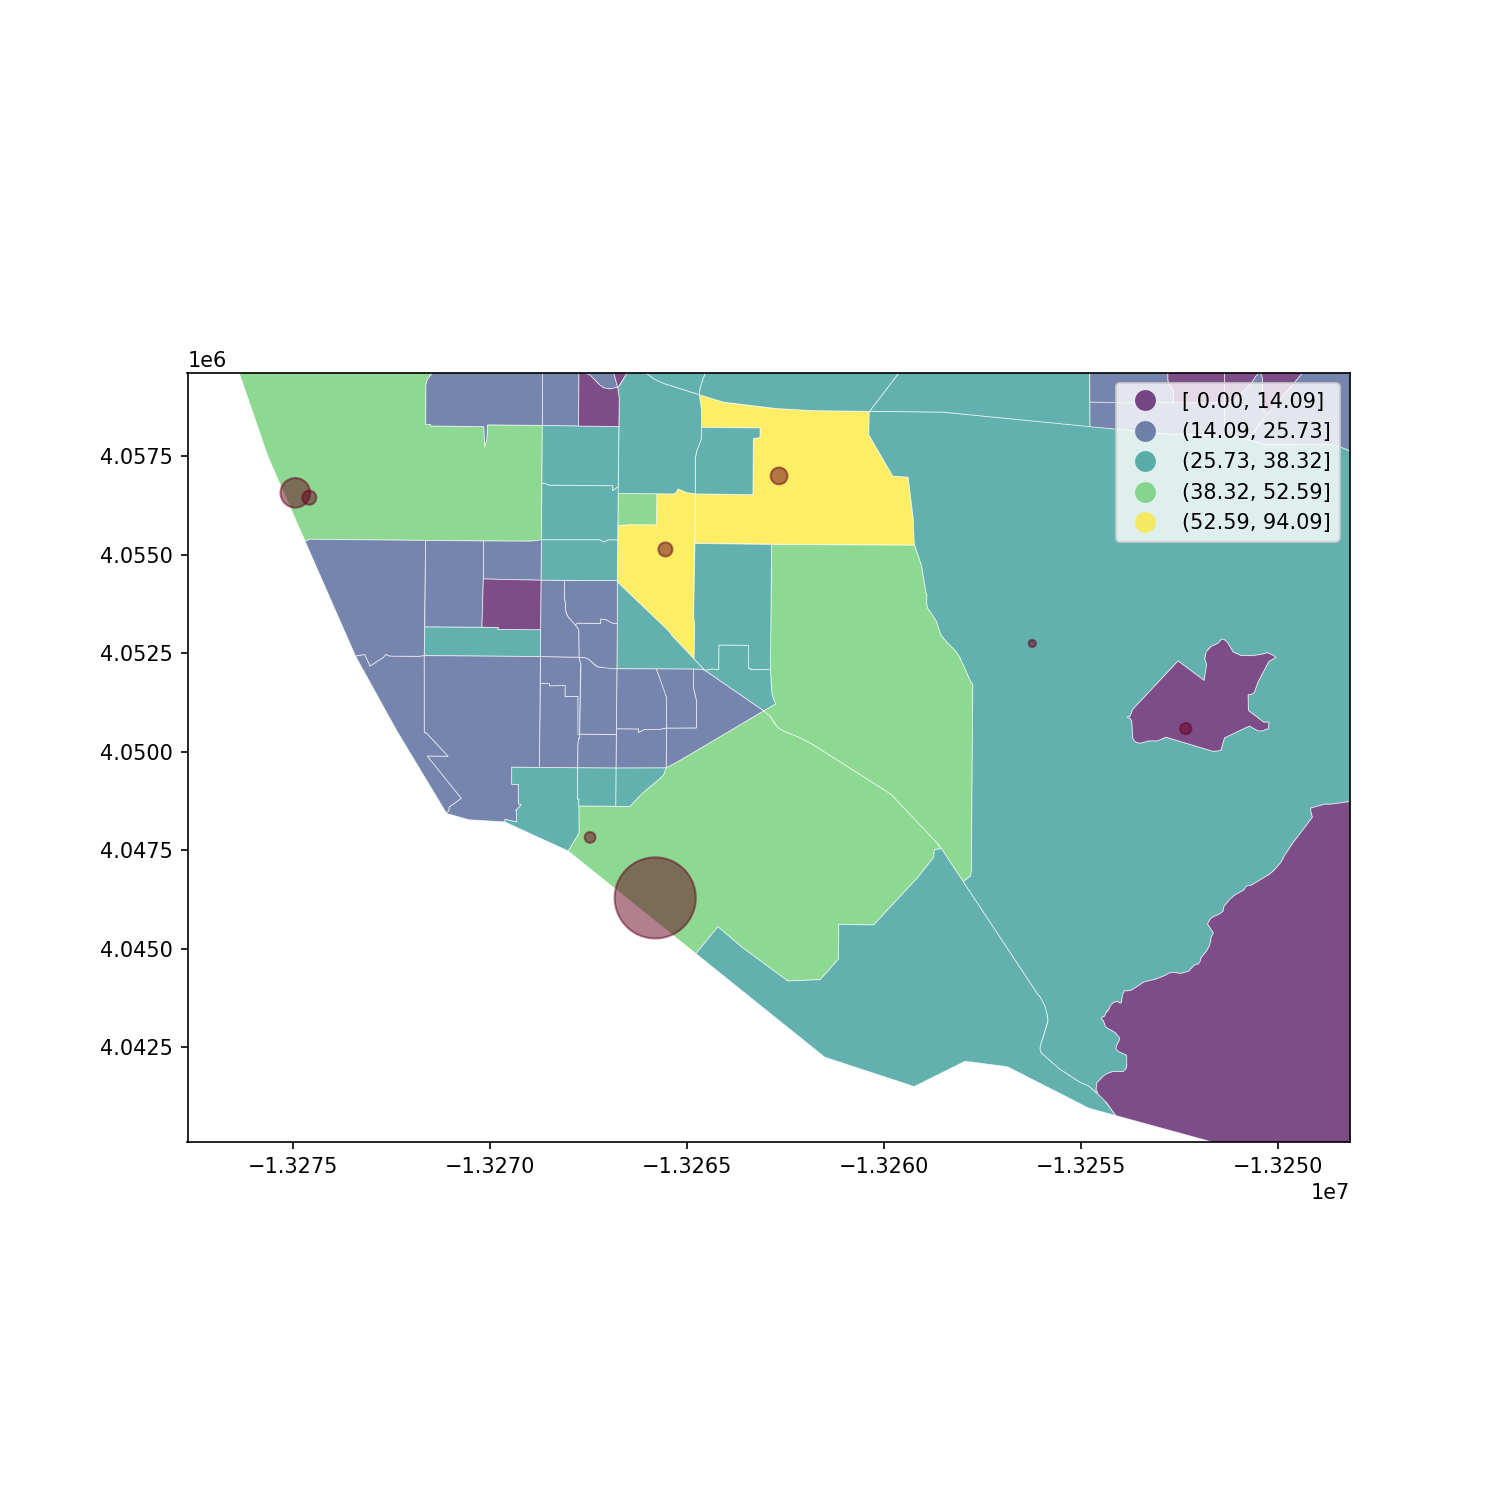

In [27]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))


# ces map
gdf_sortbyces.plot(ax=ax, # this puts it in the ax plot
        column = 'CIscore', 
        legend=True,
        edgecolor='white',
        linewidth = 0.4,
        scheme='naturalbreaks',
        alpha=0.7)

# cpp_trim
cpp_trim.plot(ax=ax, # this also puts it in the same ax plot
        cmap = 'RdBu',
        column = 'Renewable_Energy', 
        markersize=cpp_trim['Jobs'],
        alpha=0.5)

plt.show()
